# Домашняя работа 2

## Регрессия

С 1ого октября отменяется НДС на бриллианты, теперь они становятся новым инвестиционным инструментом. Давайте сделаем модель ценообразования для них.

Скачайте датасет diamonds.csv

В нем представлены характеристики бриллиантов и их цены с сайта jamesallen (B2C площадка) с 2022-07-01

**Описание полей**


* fluor - флуорисценуия (свойство камня светиться в лучах ультр)
* symmetry - показатель симметричности
* platform - название платформы, где был размещен камень
* quality_group - составной показатель из cut polish symmetry
* size_group - каратно весовая группа
* big_size_group - каратно-весовая группа
* shape - форма
* color - цвет
* clarity - чистота
* cut - качество огранки (может быть только у круглых камней)
* polish - полировка
* id - номер камня
* date - дата
* price - цена
* carat - кол-во карат
* tablepercent - размер площадки по отношению ширине
* price_per_carat - цена за карат
* z - длина (diameter)
* x - ширина
* depth_perc - отношение высоты к ширине
* y - высота



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path + '/Data Science/Профильный модуль/Большое ДЗ-2/diamonds.csv', index_col=0)

Необходимо предсказать `price_per_carat`

In [ ]:
df.sort_values(by = 'carat')

fluor symmetry    platform shape color clarity  cut polish        id  \
202754   NaN      NaN         NaN   NaN   NaN     NaN  NaN    NaN         0   
244620   NaN      NaN         NaN   NaN   NaN     NaN  NaN    NaN         0   
53946    NaN      NaN         NaN   NaN   NaN     NaN  NaN    NaN         0   
53948    NaN      NaN         NaN   NaN   NaN     NaN  NaN    NaN         0   
240999  NONE       EX  jamesallen    PS     D     VS1  NaN     EX  14459492   
...      ...      ...         ...   ...   ...     ...  ...    ...       ...   
7643    NONE       EX  jamesallen    RD     E    VVS1   EX     EX   2839630   
7640    NONE       EX  jamesallen    RD     E    VVS1   EX     EX   2839630   
7641    NONE       EX  jamesallen    RD     E    VVS1   EX     EX   2839630   
360995  NONE       EX  jamesallen    RD     D     SI2   EX     EX  14914380   
360993  NONE       EX  jamesallen    RD     D     SI2   EX     EX  14914380   

          date      price  carat  price_per_carat      z      x  depth_perc  \
202754       0        0.0   0.00             0.00   0.00   0.00         0.0   
244620       0        0.0   0.00             0.00   0.00   0.00         0.0   
53946        0        0.0   0.00             0.00   0.00   0.00         0.0   
53948        0        0.0   0.00             0.00   0.00   0.00         0.0   
240999  202205     4360.0   0.81          5382.72   7.93   5.27        62.0   
...        ...        ...    ...              ...    ...    ...         ...   
7643    202207  2380380.0  20.28        117375.74  17.66  17.57        61.0   
7640    202205  2286110.0  20.28        112727.32  17.66  17.57        61.0   
7641    202206  2286110.0  20.28        112727.32  17.66  17.57        61.0   
360995  202207  1264490.0  21.17         59730.28  17.96  18.05        59.5   
360993  202206  1214410.0  21.17         57364.67  17.96  18.05        59.5   

               y  
202754   0.00000  
244620   0.00000  
53946    0.00000  
53948    0.00000  
240999   3.26740  
...          ...  
7643    10.71770  
7640    10.71770  
7641    10.71770  
360995  10.73975  
360993  10.73975  

[222222 rows x 17 columns]

### Задание 1: Очистка

Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. Объедините данные по одному камню: подумайте, как лучше это сделать, какую цену брать.

**Попробуйте найти аномалии:** вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедитесь, что остальные параметры камня не меняются.

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней

# разделите выборку на две части

df_one = id_stat[id_stat['carat'] == 1].index
df_one = df.query('id in @df_one')  # те камни, которые встречались один раз
df_three = id_stat[(id_stat['carat'] == 2) | (id_stat['carat'] == 3)].index
df_three = df.query('id in @df_three') # те камни, которые встречались 2 или 3 раза

stat = df_three.groupby('id')[['price_per_carat', 'price']].agg(np.std) # Посчитайте стандартное отклонение по нескольким полям,
# подумайте где оно должно равняться 0, а где меняться в каких-то разумных пределах
# кажется что только цена, цена за карат и дата может меняться 
# но оказывается есть камни где высота и соответсвенно отношение высоты не равно 0

# Удалите аномальные наблюдения (можно удалить сильно выделяющиеся цены)
df_three = df_three.query('price < 50000').sort_values(by=['id','date'])

#тепреь в качестве цены возьмем последнее значение по времени
df_three = df_three.groupby('id').agg('last').reset_index() 

# соединяем результаты
df = pd.concat([df_one, df_three]).reset_index(drop=True)
df

fluor symmetry    platform shape color clarity   cut polish        id  \
0       NONE       EX  jamesallen    PS     D     SI2   NaN     EX  14224443   
1       NONE       VG  jamesallen    EM     K     SI2   NaN     VG  12902293   
2       NONE       VG  jamesallen    PS     J     VS1   NaN     VG  12771762   
3        MED       EX  jamesallen    RD     J     SI2    EX     EX  14584509   
4       NONE       EX  jamesallen    RD     G     SI1    EX     EX  14773748   
...      ...      ...         ...   ...   ...     ...   ...    ...       ...   
160613  NONE       EX  jamesallen    RD     I     SI1    EX     EX  15409696   
160614   MED       EX  jamesallen    OV     H    VVS2  None     EX  15410303   
160615  NONE       VG  jamesallen    EM     D     VS1  None     EX  15410668   
160616   MED       EX  jamesallen    EM     H     SI2  None     EX  15410717   
160617  NONE       EX  jamesallen    PR     G    VVS2    EX     EX  15412954   

          date    price  carat  price_per_carat      z     x  depth_perc  \
0       202205   9120.0   1.51          6039.74  10.67  6.23        59.0   
1       202205   1390.0   0.91          1527.47   6.30  4.58        71.0   
2       202207  15990.0   2.27          7044.05  11.66  7.26        62.2   
3       202205   3700.0   1.01          3663.37   6.37  6.42        62.0   
4       202206   7170.0   1.00          7170.00   6.30  6.35        63.7   
...        ...      ...    ...              ...    ...   ...         ...   
160613  202207   6040.0   1.01          5980.20   6.46  6.49        60.8   
160614  202207   6620.0   1.01          6554.46   7.76  5.40        65.0   
160615  202207  14750.0   1.50          9833.33   7.84  5.43        65.8   
160616  202207  48230.0   4.53         10646.80  11.61  7.57        67.5   
160617  202207   7100.0   1.20          5916.67   5.80  5.76        72.4   

              y  
0       3.67570  
1       3.25180  
2       4.51572  
3       3.98040  
4       4.04495  
...         ...  
160613  3.94592  
160614  3.51000  
160615  3.57294  
160616  5.10975  
160617  4.17024  

[160618 rows x 17 columns]

Цены на бриллианты достаточно сильно меняются, попробуйте вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

*Определите эти группы и рассчитайте коэффициенты инфляции для каждой из них. Подправьте цены на эти коэффициенты и создайте новую переменную.*

In [ ]:
categories = ['carat'] #определите по каким группам отпределять инфляцию (к примеру можно добавить каратную группу)

df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
             .mean()\
             .reset_index() # индекс цен

date_max = df_index.date.max()


df_index = df_index.merge(df_index.query('date == @date_max')[categories + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max'}), 
                          on=categories, how='outer') # сопоставляем группы с максимальной датой

df_index['inflation'] = df_index['price_per_carat_max'] / df_index.price_per_carat # вычисляем инфляцию

df_with_inf = df.merge(df_index[['date'] + categories + ['inflation']], 
                        on=['date'] + categories, how='left') # соединяем все в одной таблице

df_with_inf

fluor symmetry    platform shape color clarity   cut polish        id  \
0       NONE       EX  jamesallen    PS     D     SI2   NaN     EX  14224443   
1       NONE       VG  jamesallen    EM     K     SI2   NaN     VG  12902293   
2       NONE       VG  jamesallen    PS     J     VS1   NaN     VG  12771762   
3        MED       EX  jamesallen    RD     J     SI2    EX     EX  14584509   
4       NONE       EX  jamesallen    RD     G     SI1    EX     EX  14773748   
...      ...      ...         ...   ...   ...     ...   ...    ...       ...   
160613  NONE       EX  jamesallen    RD     I     SI1    EX     EX  15409696   
160614   MED       EX  jamesallen    OV     H    VVS2  None     EX  15410303   
160615  NONE       VG  jamesallen    EM     D     VS1  None     EX  15410668   
160616   MED       EX  jamesallen    EM     H     SI2  None     EX  15410717   
160617  NONE       EX  jamesallen    PR     G    VVS2    EX     EX  15412954   

          date    price  carat  price_per_carat      z     x  depth_perc  \
0       202205   9120.0   1.51          6039.74  10.67  6.23        59.0   
1       202205   1390.0   0.91          1527.47   6.30  4.58        71.0   
2       202207  15990.0   2.27          7044.05  11.66  7.26        62.2   
3       202205   3700.0   1.01          3663.37   6.37  6.42        62.0   
4       202206   7170.0   1.00          7170.00   6.30  6.35        63.7   
...        ...      ...    ...              ...    ...   ...         ...   
160613  202207   6040.0   1.01          5980.20   6.46  6.49        60.8   
160614  202207   6620.0   1.01          6554.46   7.76  5.40        65.0   
160615  202207  14750.0   1.50          9833.33   7.84  5.43        65.8   
160616  202207  48230.0   4.53         10646.80  11.61  7.57        67.5   
160617  202207   7100.0   1.20          5916.67   5.80  5.76        72.4   

              y  inflation  
0       3.67570   1.051010  
1       3.25180   1.031381  
2       4.51572   1.000000  
3       3.98040   1.055734  
4       4.04495   1.049673  
...         ...        ...  
160613  3.94592   1.000000  
160614  3.51000   1.000000  
160615  3.57294   1.000000  
160616  5.10975   1.000000  
160617  4.17024   1.000000  

[160618 rows x 18 columns]

### Задание 2: Модель

Определите функцию потерь (MSE или MAE) и аргументируйте выбор.
Попробуйте сделать baseline.
Используйте LableEncoder для категориальных фичей и **постройте линейную модель**.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

# Исключим колонку platform (тк знаенчие одно для всех строк)
# Исключим колонку cut (мы с ней ничего не делали, как вариант можно Nan значения заменить на новую категорию не круглые)
# Исключим колонку depth_perc она получается из колонки ширина и высота
# По той же логике исключим колонку price 
df = df.drop(columns=['platform', 'cut', 'depth_perc', 'price'])

object_columns = ['fluor', 'symmetry', 'shape', 'color', 'clarity', 'polish']

# LabelEncoder
df_labelencoder = df.copy()
df_labelencoder[object_columns] = df_labelencoder[object_columns].apply(LabelEncoder().fit_transform)

X = df_labelencoder.drop(columns=["price_per_carat"])
X = X.dropna()
y = df_labelencoder["price_per_carat"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

# Бейзлайн на дамми
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
dummy_y_pred = dummy_regr.predict(X_valid)

# Линейная регрессия
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_y_pred = lin_reg.predict(X_valid)

print(f'MAE_Dummy = {mean_absolute_error(y_valid,dummy_y_pred)}  \
        MAE_Linear = {mean_absolute_error(y_valid,lin_reg_y_pred)}')

MAE_Dummy = 2861.834100157431          MAE_Linear = 1424.6663373905774


Теперь попробуйте OHE или TargetEncoder (сравните их).

Нормализуйте данные.

Поработайте с пропусками (обратите внимание на то, что у fluor возможен пропуск значения, а возможно отсутствие флуоресценции)

Покажите, насколько получилось улучшить результат.

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.9 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from typing import Tuple, List


def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    index = df.index
    one = OneHotEncoder(sparse=False, categories='auto')
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names_out(input_features = columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis = 1)
    df = df.set_index(index)
    return (df, col_names)

# One hot encoding
cat_columns = ['fluor', 'symmetry', 'shape', 'color', 'clarity', 'polish']
int_columns = df.drop(columns=cat_columns)
df,cat_columns = OHE(df,cat_columns)

X = df.drop(columns=["price_per_carat"])
y = df["price_per_carat"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

# Нормализация данных
scaler = StandardScaler()
# Помните, что на тесте делаем только transform
scaler.fit(X_train,y_train)
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

# Бейзлайн на дамми
dummy_regr = DummyRegressor()
dummy_regr.fit(X_train_normed, y_train)
dummy_y_pred = dummy_regr.predict(X_valid_normed)

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train_normed,y_train)
lin_reg_y_pred = lin_reg.predict(X_valid_normed)

print(f'MAE_Dummy = {mean_absolute_error(y_valid,dummy_y_pred)}  \
        MAE_Linear = {mean_absolute_error(y_valid,lin_reg_y_pred)}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MAE_Dummy = 2861.834100157431          MAE_Linear = 1070.5497620984347


Сравните работу выбранной вами линейной модели с KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train_normed,y_train)
knn_y_pred = neigh.predict(X_valid_normed)


print(f'MAE_Knn = {mean_absolute_error(y_valid,knn_y_pred)}')

MAE_Knn = 767.8628787822189


## Классификация

Загрузите датасет bodyPerformance

Описание:

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path + '/Data Science/Профильный модуль/Большое ДЗ-2/bodyPerformance.csv') #укажите свой путь

In [ ]:
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

### Задание 1: Определение гендера

Постройте модель, которая будет определять гендер.

Для этого определите две метрики качества, на которые вы будете смотреть. Аргументируйте свой выбор.

После чего преобразуйте категориальные переменные и постройте модель бинарной классификации на основе линейного классификатора и сравните с KNN.

P.S.: не забудте про нормализацию.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df.drop(columns=["gender"])
y = df["gender"]

# Применим OHE
X, cat_col = OHE(X, X.columns[X.dtypes == object])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

# Нормализация данных
scaler = StandardScaler() # Помните, что на тесте делаем только transform
scaler.fit(X_train,y_train)
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

# kNN
knn = KNeighborsClassifier(n_neighbors=59) 
clf_knn = knn.fit(X_train_normed, y_train)
y_knn = clf_knn.predict(X_valid_normed)

# Линейный классификатор
log_reg = LogisticRegression(random_state=0, n_jobs=-1)
log_reg = log_reg.fit(X_train_normed, y_train)
y_log_reg = log_reg.predict(X_valid_normed)

# Для примера посчитаем accuracy
print ('knn =', metrics.accuracy_score(y_valid, y_knn), 'log_reg =', metrics.accuracy_score(y_valid, y_log_reg))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


knn = 0.9876819708846585 log_reg = 0.990294886151549


### Задание 2: Определение класса

Теперь опробуем построить модель, которая будет предсказывать class физической формы.

Для этого определите метрики качества для задачи мультиклассификации (аргументируйте выбор).

Постройте модель мультиклассовой классификации на основе линейного классификатора и сравните с KNN.

In [ ]:
X = df.drop(columns=["class"]) # укажите новый таргет
y = df["class"]

# Применим OHE
X, cat_col = OHE(X, X.columns[X.dtypes == object])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

# Нормализация данных
scaler.fit(X_train,y_train)
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# kNN
clf_knn = KNeighborsClassifier().fit(X_train_normed, y_train)
y_knn = clf_knn.predict(X_valid_normed)
y_knn_proba = clf_knn.predict_proba(X_valid_normed)

# Линейный классификатор
log_reg = LogisticRegression(random_state=0, n_jobs=-1).fit(X_train_normed, y_train)
y_log_reg = log_reg.predict(X_valid_normed)
y_log_reg_proba = log_reg.predict_proba(X_valid_normed)

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [ ]:
# Для примера посчитаем accuracy
print ('knn =', metrics.accuracy_score(y_valid, y_knn), 'log_reg =', metrics.accuracy_score(y_valid, y_log_reg))

knn = 0.59163867114595 log_reg = 0.6151549085479656


Text(0.5, 52.7222222222222, 'Predicted value')

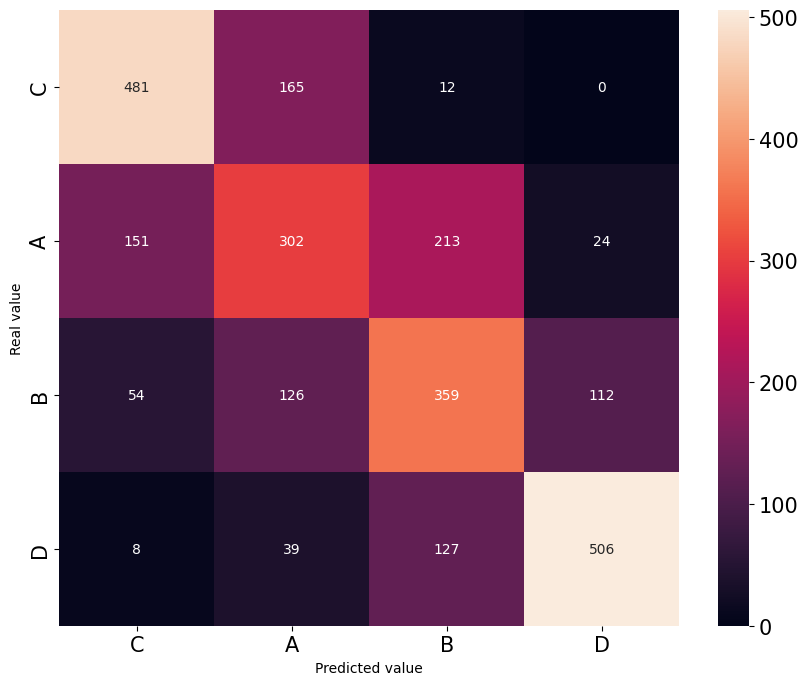

In [ ]:
mp_mtx = metrics.confusion_matrix(y_valid, y_log_reg)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=df["class"].unique(), 
            yticklabels=df["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")